#  Linear Regression

Source: http://aimotion.blogspot.com.au/2011/10/machine-learning-with-python-linear.html

Load and Plot Data

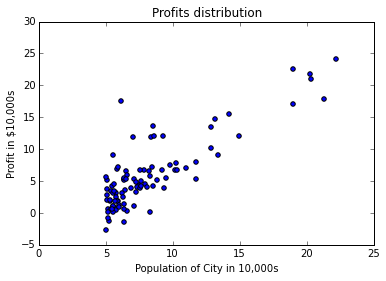

In [97]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour
%matplotlib inline

#Plot the data
scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
show()

Intialise

In [98]:
X = data[:, 0]
y = data[:, 1]

#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = X

#Initialize theta parameters
theta = ones(shape=(2, 1))

#Some gradient descent settings
iterations = 1500
alpha = 0.01

Cost Function and Gradient Descent

In [99]:
#Evaluate the linear regression
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size
    predictions = X.dot(theta).flatten()
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()
    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in xrange(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]

        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

10.2665204914
[[-3.57081935]
 [ 1.16038773]]
For population = 35,000, we predict a profit of 4905.377182
For population = 70,000, we predict a profit of 45518.947869


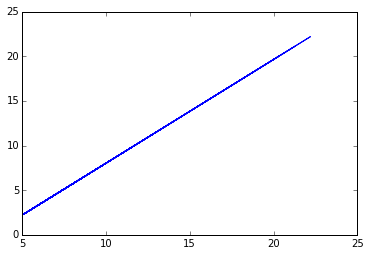

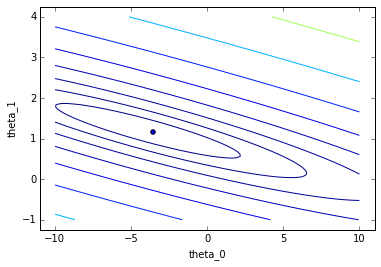

In [91]:
#compute and display initial cost
print compute_cost(it, y, theta)

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)

print theta
#Predict values for population sizes of 35,000 and 70,000
predict1 = array([1, 3.5]).dot(theta).flatten()
print 'For population = 35,000, we predict a profit of %f' % (predict1 * 10000)
predict2 = array([1, 7.0]).dot(theta).flatten()
print 'For population = 70,000, we predict a profit of %f' % (predict2 * 10000)

#Plot the results
result = it.dot(theta).flatten()
plot(data[:, 0], result)
show()


#Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100)
theta1_vals = linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = zeros(shape=(theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = compute_cost(it, y, thetaT)

#Contour plot
J_vals = J_vals.T
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('theta_0')
ylabel('theta_1')
scatter(theta[0][0], theta[1][0])
show()